# #️⃣ MNIST Classification - 99.6% Accuracy (TOP 10% Leaderboard)

<img src='https://drive.google.com/uc?export=download&id=16b1e8LPq6YwepaXv2UEbKZ5tjpZ0nqoe'>

This notebooks aims to permform a very high score (99.6%) based on the famous **MNIST dataset** from Kaggle containing *42000 examples* in the training set.

Once the model trained, predictions will be made on the *28000 test images* and submitted to the competition.

# Getting Started

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load Data

In [3]:
# Load the images into pandas dataframes
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Prepare X and y
X_train = (train.drop('label', axis=1) / 255).values.reshape(-1, 28, 28, 1)
X_test = (test / 255).values.reshape(-1, 28, 28, 1)
y_train = np.array(pd.get_dummies(train['label']))

# Display Data

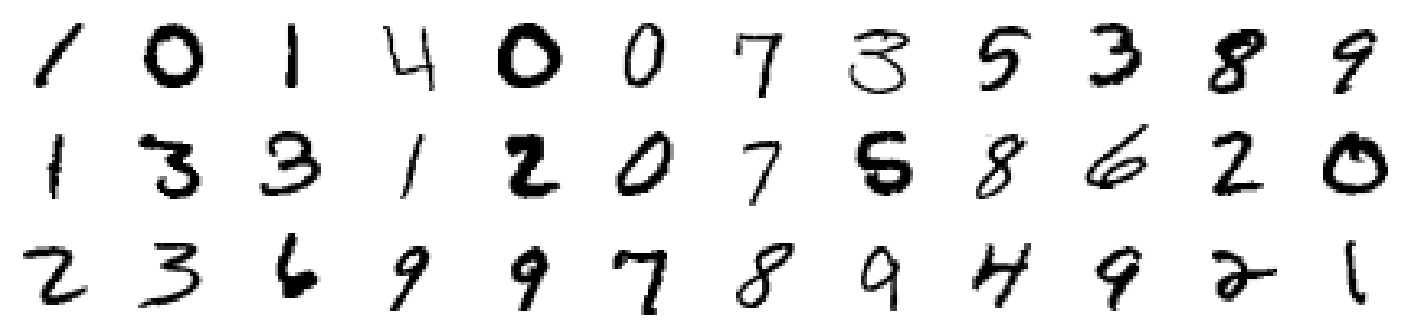

In [4]:
plt.figure(figsize=(18, 4))

for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')

plt.show()

# Generate More Images

In [5]:
# Data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

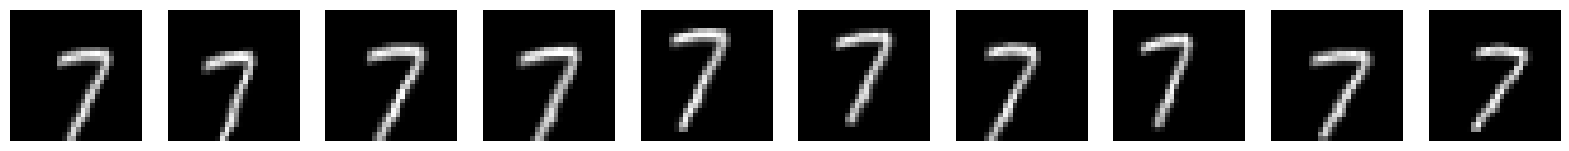

In [6]:
# Example of image generations
X_example = X_train[18].reshape(1, 28, 28, 1)
y_example = y_train[18].reshape(1, 10)

plt.figure(figsize=(20, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    X_new, y_new = datagen.flow(X_example, y_example).next()
    plt.imshow(X_new.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

# Training

In [7]:
inputs = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

2024-05-31 22:29:54.468760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-31 22:29:54.955346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-31 22:29:54.955845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-31 22:29:54.987072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632 

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.9, shuffle=True, random_state=0
)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']   
)

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=1,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda x: 1e-3 * 0.95 ** x, verbose=0
        )
    ]
)

/tmp/ipykernel_251065/2243900794.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2024-05-31 22:40:12.873393: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


591/591 [==============================] - 17s 22ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0450 - val_accuracy: 0.9876 - lr: 0.0010


# Results

In [11]:
print("Training Accuracy: {:.3f} %".format(max(history.history['accuracy']) * 100))
print("Validation Accuracy: {:.3f} %".format(max(history.history['val_accuracy']) * 100))

Training Accuracy: 98.963 %
Validation Accuracy: 98.762 %


# Display Predictions

In [12]:
predictions = model.predict(X_test).argmax(axis=1)

2024-05-31 22:40:36.370621: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 87808000 exceeds 10% of free system memory.
2024-05-31 22:40:37.165685: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 87808000 exceeds 10% of free system memory.


875/875 [==============================] - 2s 3ms/step


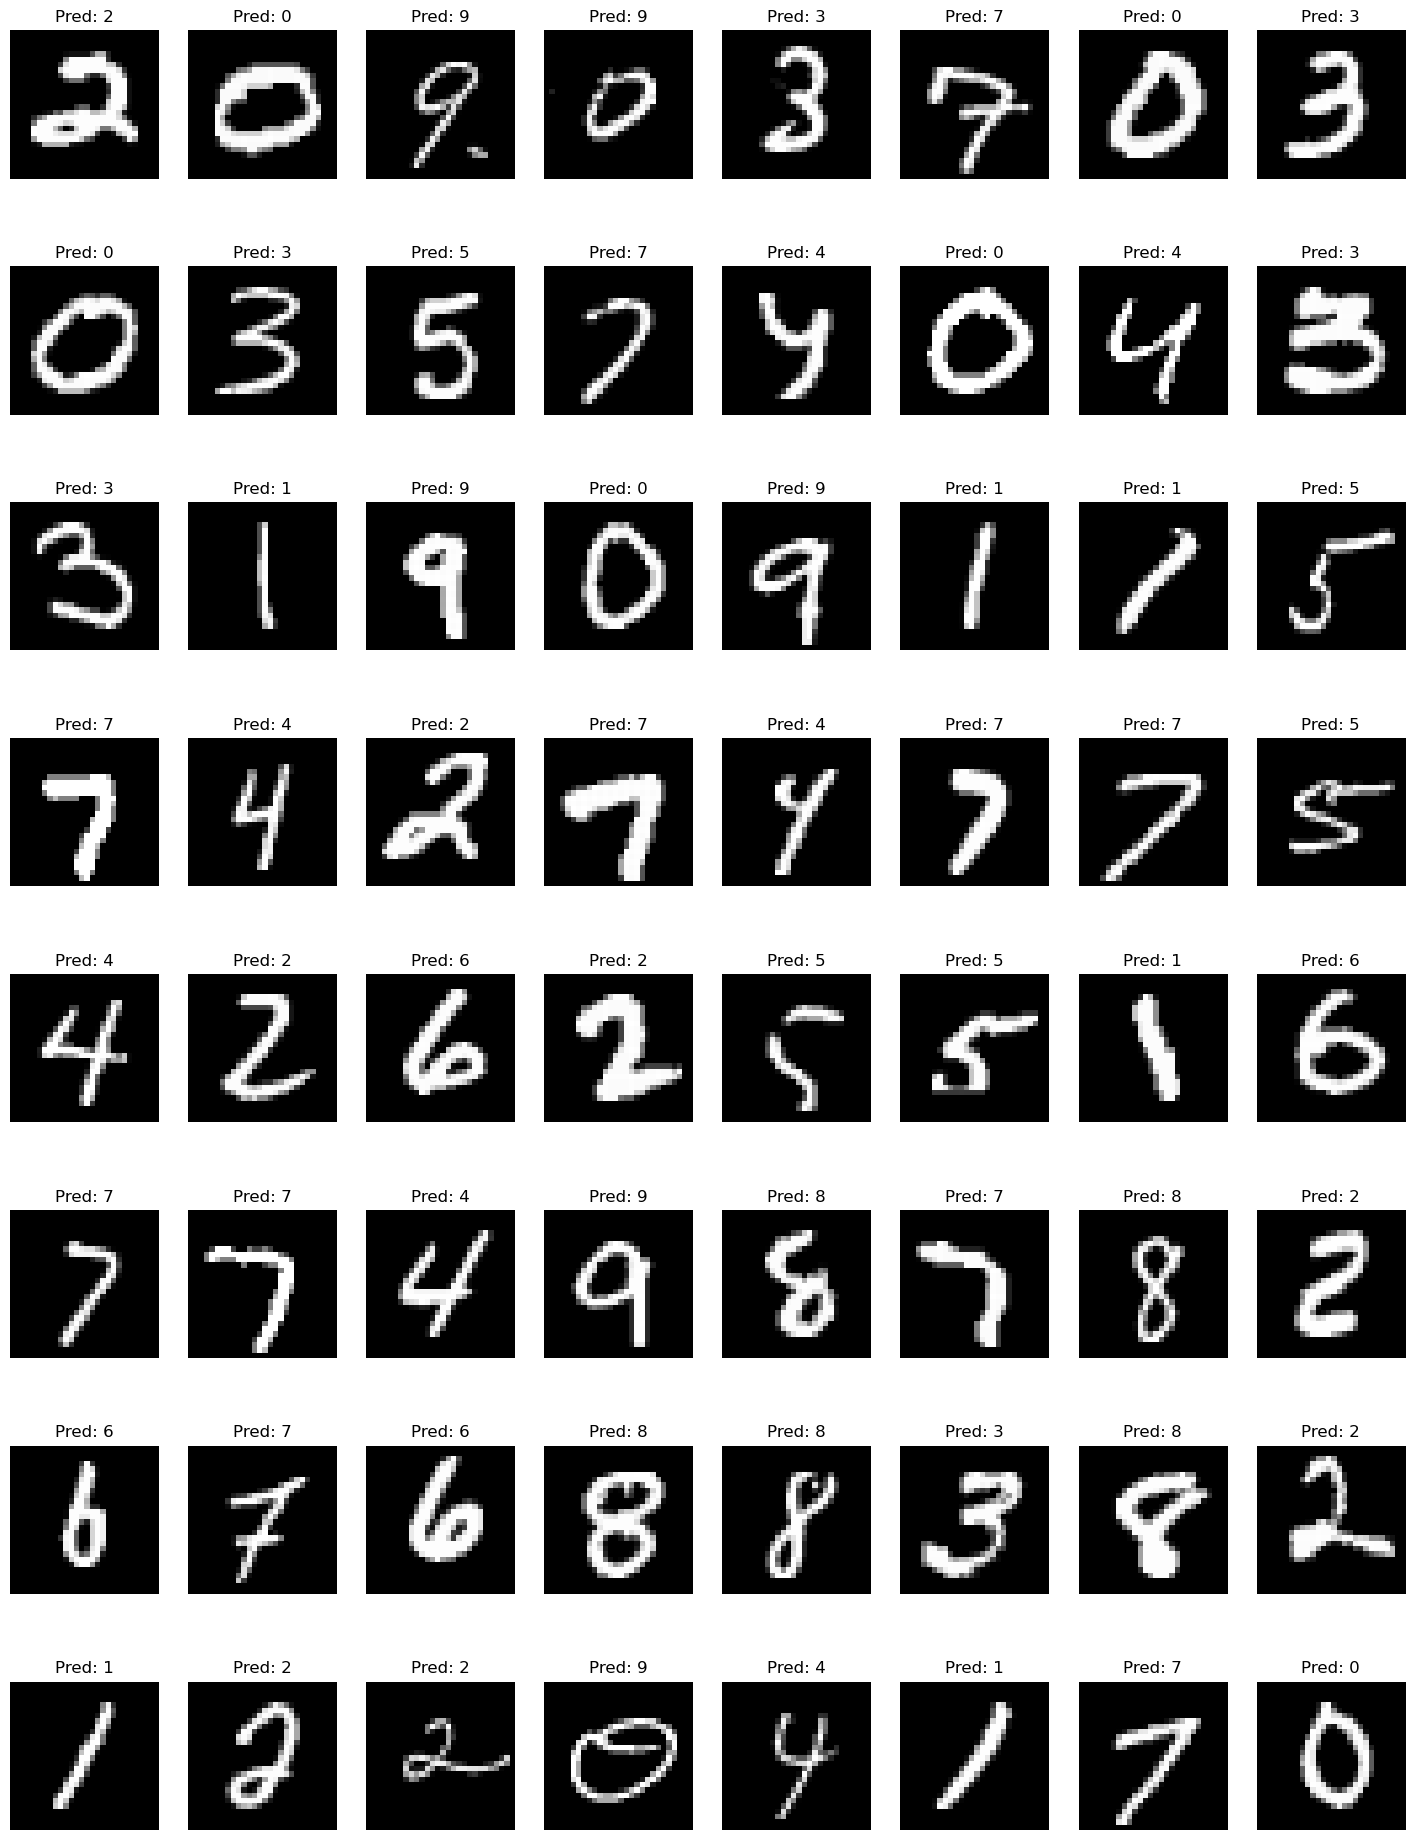

In [13]:
# Display predictions
plt.figure(figsize=(18, 24))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
    
plt.show()

# Generate Submission

In [14]:
tf.saved_model.save(model, "model")

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [ ]:
predictions

# 1